### PANDAS

1. Pandas is a pyhton library used for working with data set.
2. its has functions for analyzing,cleaning,exploring and manipulating data.
3. the name 'pandas' has reference to both 'panel data' and python data analyzing.

#### Why Use pandas:
1.pandas allows to us analyzing big data and make conclusions based on Statistical theories.
2.pandas can clean messy data sets.and make them readble and relevent.
3.Relevant data is very important in data science.

#### What can pandas do:
1.Is there a correlation between two or more columns?
2.what is avg value?
3.max value?
4.min value?

Pandas are also able to delete rows that are not relevant,or contains wrong values,like empty or null values.this is called cleaning the data.

###### installation
pip install pandas

#### key data structures
##### Series: 
A one-dimensional labeled array capable of holding any data type(integer,string,floats).      

In [3]:
import pandas as pd
s=pd.Series([1,2,3,4],index=['a','b','c','d'])
print(s)


a    1
b    2
c    3
d    4
dtype: int64


#### Data Frame:
A two-dimensional labeled data structure with columns of potentially different types,similar to a spreadsheet or sql table.

In [73]:
data={ 'name':['alice','mani','vasu','ravi'],
      'age':[23,20,21,21],
      'city':['new york','snk','snkm','antp']}
df=pd.DataFrame(data)
print(df)
      

    name  age      city
0  alice   23  new york
1   mani   20       snk
2   vasu   21      snkm
3   ravi   21      antp


## DataFrame Manipulations
##### Accessing Data:

In [75]:
## By column:
print(df['name'])

0    alice
1     mani
2     vasu
3     ravi
Name: name, dtype: object


In [77]:
## By row:
print(df.loc[0])

name       alice
age           23
city    new york
Name: 0, dtype: object


### Filtering Data:

In [79]:
filtered_df=df[df['age']>20]
print(filtered_df)

    name  age      city
0  alice   23  new york
2   vasu   21      snkm
3   ravi   21      antp


### Adding New Columns:

In [81]:
df['salary']=[50000,60000,70000,40000]
print(df)

    name  age      city  salary
0  alice   23  new york   50000
1   mani   20       snk   60000
2   vasu   21      snkm   70000
3   ravi   21      antp   40000


## Handling Missing Data

##### Identifying Missing values:

In [83]:
df.loc[1,'age']=None
print(df.isnull())

    name    age   city  salary
0  False  False  False   False
1  False   True  False   False
2  False  False  False   False
3  False  False  False   False


##### FILLING MISSING VALUES:

In [85]:
df['age'].fillna(df['age'].median(),inplace=True)
print(df)

    name   age      city  salary
0  alice  23.0  new york   50000
1   mani  21.0       snk   60000
2   vasu  21.0      snkm   70000
3   ravi  21.0      antp   40000


C:\Users\kamis\AppData\Local\Temp\ipykernel_14884\2557212624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


#### Dropping Missing values:
Drop rows with NaN values

In [87]:
df.dropna(inplace=False)
print(df)

    name   age      city  salary
0  alice  23.0  new york   50000
1   mani  21.0       snk   60000
2   vasu  21.0      snkm   70000
3   ravi  21.0      antp   40000


## DATA AGGREGATION AND GROUPING

##### Group by:

In [91]:
df['city'] = pd.to_numeric(df['city'], errors='coerce')

grouped=df.groupby('city').mean()
print(grouped,df.loc[1])

Empty DataFrame
Columns: [name, age, salary]
Index: [] name       mani
age        21.0
city        NaN
salary    60000
Name: 1, dtype: object


### Aggregating Data:

In [33]:
aggregation=df.agg({'age':'mean','salary':'sum'})
print(aggregation)

age           21.25
salary    220000.00
dtype: float64


#### Merging and Joining DataFrames:
##### Concatenation:

In [61]:
df2=pd.DataFrame({'name':['vamsi'],'age':[21],'city':['kdp'],'salary':[65000]})
concatenated=pd.concat([df,df2],ignore_index=True)
print(concatenated)

    name  age city  salary
0  alice   23  NaN   50000
1   mani   20  NaN   60000
2   vasu   21  NaN   70000
3   ravi   21  NaN   40000
4  vamsi   21  kdp   65000


#### Merging:

In [113]:
df3=pd.DataFrame({'city':['NaN','kdp'],'population':[45000,54000]})
merged=pd.merge(df,df3,on='city')
print(merged)

#here we have an value erorr You are trying to merge on float64 and object columns for key 'city'.

Empty DataFrame
Columns: [city, population_x, population_y]
Index: []


###### You are trying to merge on float64 and object columns for key 'city' occurs because the city column in df and df3 have different data types. One of them is float64 and the other is object, which means that they can't be merged directly.

###### This issue often happens if NaN values are present, as NaN is interpreted as float64 in Pandas, which can create a mismatch if the other column has object data type.

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
import pandas as pd
import numpy as np

# Create the dataframes
df = pd.DataFrame({'city': ['NaN', 'hyd'], 'population': [100000, 200000]})
df3 = pd.DataFrame({'city': ['NaN', 'kdp'], 'population': [45000, 54000]})

# Replace 'NaN' strings with actual NaN values
df['city'].replace('NaN', np.nan, inplace=True)
df3['city'].replace('NaN', np.nan, inplace=True)

# Convert city columns to string type to ensure compatibility for merging
df['city'] = df['city'].astype(str)
df3['city'] = df3['city'].astype(str)

# Merge the dataframes
merged = pd.merge(df, df3, on='city')
print(merged)


  city  population_x  population_y
0  nan        100000         45000


#### Data Visualization
###### Basic plotting:
Using Matplotlib with pandas for visualization.

In [129]:
import matplotlib.pyplot as plt

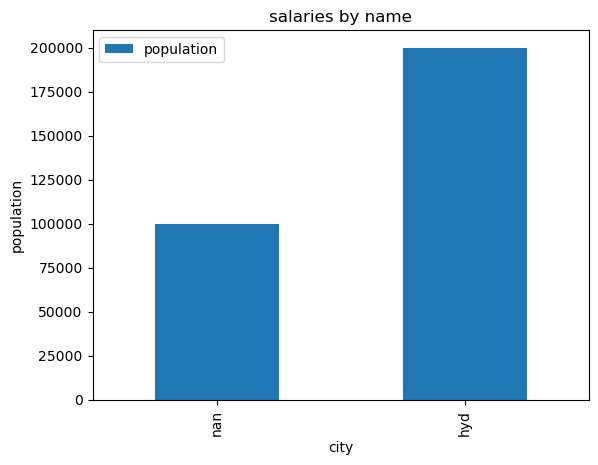

In [141]:
df.plot(x='city',y='population',kind='bar')
plt.title('salaries by name')
plt.ylabel('population')
plt.show()

#### Time Series Data
##### Creating Time Series:

In [165]:
dates=pd.date_range('2024-01-01',periods=6)
time_series=pd.Series([100,200,300,400,500,600],index=dates)
print(time_series)

2024-01-01    100
2024-01-02    200
2024-01-03    300
2024-01-04    400
2024-01-05    500
2024-01-06    600
Freq: D, dtype: int64


#### Resampling Time Series:

In [167]:
resampled=time_series.resample('2D').sum()
print(resampled)

2024-01-01     300
2024-01-03     700
2024-01-05    1100
Freq: 2D, dtype: int64


### File I/O with pandas:
##### Reading CSV files:

In [ ]:
df_file_csv=pd.read_csv('give file path')
print(df_file_csv)# then file will be execute


#### Writing to CSV files:

In [ ]:
df.to_csv('output.csv',index=False) # save dataframe to csv file without index

#### Applying Function
##### USing apply():

In [181]:
df['over all population tax']=df['population'].apply(lambda x:x*0.8)
#apply function to each elemnt
print(df)

  city  population  salary after tax  over all population tax
0  nan      100000           80000.0                  80000.0
1  hyd      200000          160000.0                 160000.0


#### String Manipulation
##### String operations:

In [183]:
df['city upper']=df['city'].str.upper()
#Convert citys to uppercase
print(df)

  city  population  salary after tax  over all population tax city upper
0  nan      100000           80000.0                  80000.0        NAN
1  hyd      200000          160000.0                 160000.0        HYD


#### String replacement:

In [191]:
df['city']=df['city'].str.replace('hyd','HYD')
#replace city names
print(df)

  city  population  salary after tax  over all population tax city upper
0  SNK      100000           80000.0                  80000.0        NAN
1  HYD      200000          160000.0                 160000.0        HYD


#### Categorical Data
##### Creating categorical data:

In [193]:
df['city']=df['city'].astype('category')
# Convert city column to categorical
print(df['city'].cat.codes)
#Display categorical codes

0    1
1    0
dtype: int8


#### Advanced Indexing and Selection
##### MultiIndex:

In [199]:
arrays=[['A','A','B','B'],['one','two','three','four']]
index=pd.MultiIndex.from_arrays(arrays,names=('first','second'))
df_multi=pd.DataFrame({'data':[1,2,3,4]},index=index)
print(df_multi)

              data
first second      
A     one        1
      two        2
B     three      3
      four       4


#### Selecting Data With MultiIndex:

In [201]:
print(df_multi.loc['A'])#slect all data for index 'a'

        data
second      
one        1
two        2


#### Reshaping Data:
##### Using melt():

In [215]:
df_melted=df.melt(id_vars=['city'],value_vars=['population'],var_name='variable'
,value_name='value')
print(df_melted)

  city    variable   value
0  SNK  population  100000
1  HYD  population  200000


#### Common Methods And Functions
##### Basic Descriptive statistics:

In [217]:
print(df.describe())# summary statistics for numarical columns

          population  salary after tax  over all population tax
count       2.000000          2.000000                 2.000000
mean   150000.000000     120000.000000            120000.000000
std     70710.678119      56568.542495             56568.542495
min    100000.000000      80000.000000             80000.000000
25%    125000.000000     100000.000000            100000.000000
50%    150000.000000     120000.000000            120000.000000
75%    175000.000000     140000.000000            140000.000000
max    200000.000000     160000.000000            160000.000000


##### Getting Unique Values:
get unique values from city

In [221]:
unique_cities=df['city'].unique()
print(unique_cities)

['SNK', 'HYD']
Categories (2, object): ['HYD', 'SNK']


#### Counting values:
count pccurrences of each unique value

In [223]:
city_counts=df['city'].value_counts()
print(city_counts)

city
HYD    1
SNK    1
Name: count, dtype: int64


#### ADVANCED GROUPING TECHNIQUES
##### Using groupby() with multiple columns:

In [227]:
df['city'] = pd.to_numeric(df['city'], errors='coerce')
df['Department']=['HR','Finance']
grouped_multi=df.groupby(['city','Department']).mean()
print(grouped_multi)

Empty DataFrame
Columns: [population, salary after tax, over all population tax, city upper]
Index: []


In [229]:
df.columns

Index(['city', 'population', 'salary after tax', 'over all population tax',
       'city upper', 'Department'],
      dtype='object')

#### Data Frame Indexing Techniques
##### using .iloc[] for position-based indexing:
Output will show the first row data

In [239]:
print(df.iloc[0])

city                           NaN
population                  100000
salary after tax           80000.0
over all population tax    80000.0
city upper                     NAN
Department                      HR
Name: 0, dtype: object


#### using.loc[] for label-based Indexing:
 Access name of the first row

In [245]:
print(df.loc[0,'Department'])

HR
